# EXP1
Implement programs for time series data cleaning, loading and handling time series data and pre-processing techniques.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime,timedelta

In [ ]:
random.seed(42)
rows=15

In [ ]:
start_date=datetime(2025,1,1)
timestamps = [start_date + timedelta(hours=i) for i in range(rows)]

In [ ]:
exchange_rate = [round(random.uniform(82, 85), 2) for _ in range(rows)]
high = [round(random.uniform(83, 86), 2) for _ in range(rows)]
low = [round(random.uniform(81, 83), 2) for _ in range(rows)]
volume = [random.randint(9000, 12000) for _ in range(rows)]

In [ ]:
missing=random.sample(range(rows),k=3)
for idx in missing:
  exchange_rate[idx]=np.nan
  timestamps[idx]=np.nan

In [ ]:
data={
    'Datetime':timestamps,
    'Exchange Rate (USD to INR)':exchange_rate,
    'High (INR)':high,
    'Low (INR)':low,
    'Volume':volume
}

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df['Datetime']=pd.to_datetime(df['Datetime'],errors='coerce')



In [ ]:
df

,Datetime,Exchange Rate (USD to INR),High (INR),Low (INR),Volume
0,2025-01-01 00:00:00,83.92,84.63,82.61,9953
1,NaT,NaN,83.66,82.46,9413
2,2025-01-01 02:00:00,82.83,84.77,82.07,10556
3,2025-01-01 03:00:00,82.67,85.43,82.95,10138
4,2025-01-01 04:00:00,84.21,83.02,81.76,10857
5,2025-01-01 05:00:00,84.03,85.42,82.10,11603
6,2025-01-01 06:00:00,84.68,85.09,82.66,10494
7,2025-01-01 07:00:00,82.26,84.02,82.24,9666
8,2025-01-01 08:00:00,83.27,83.47,82.72,10516
9,NaT,NaN,85.87,82.15,10455


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Datetime                    12 non-null     datetime64[ns]
 1   Exchange Rate (USD to INR)  12 non-null     float64       
 2   High (INR)                  15 non-null     float64       
 3   Low (INR)                   15 non-null     float64       
 4   Volume                      15 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 732.0 bytes


In [ ]:
df['Exchange Rate (USD to INR)'] = df['Exchange Rate (USD to INR)'].interpolate(method='linear')
df['Datetime']=df['Datetime'].fillna(method='ffill')

<ipython-input-11-4207b4262ecd>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Datetime']=df['Datetime'].fillna(method='ffill')


In [ ]:
df.describe()

,Datetime,Exchange Rate (USD to INR),High (INR),Low (INR),Volume
count,15,15.000000,15.000000,15.000000,15.000000
mean,2025-01-01 06:44:00,83.345667,84.420667,82.094667,10601.333333
min,2025-01-01 00:00:00,82.080000,83.020000,81.090000,9413.000000
25%,2025-01-01 03:30:00,82.750000,83.565000,81.670000,10023.000000
50%,2025-01-01 07:00:00,83.375000,84.630000,82.150000,10494.000000
75%,2025-01-01 09:30:00,83.935000,85.255000,82.535000,11230.000000
max,2025-01-01 14:00:00,84.680000,85.870000,82.950000,11874.000000
std,NaN,0.746193,0.944506,0.574964,810.906782


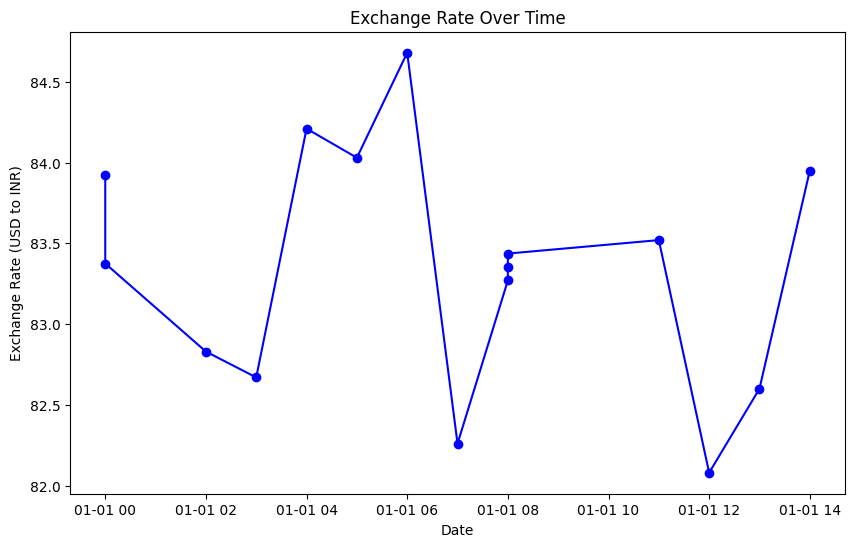

In [ ]:
#Line plot
plt.figure(figsize=(10,6))
plt.plot(df['Datetime'],df['Exchange Rate (USD to INR)'],marker='o',linestyle='-',color='b')
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD to INR)')
plt.grid=True
plt.xticks=rotation=45
plt.show()
